### **Programa para realizar la grafica de varios conjuntos de datos**

In [1]:
#Esto pemite montar la carpeta de drive en el espacio de google colab
#Se debe dar permisos para poder montar los archivos del drive
from google.colab import drive
import sys
drive.mount('/content/gdrive')
#cd path/to/your/folder
#!cd /content/gdrive/MyDrive/"Colab Notebooks"
#sys.path.append('/content/gdrive/My Drive/Colab Notebooks/')

!ls  #listamos el directorio en el que estamos ubicados


Mounted at /content/gdrive
gdrive	sample_data


In [2]:
#Especificamos la ruta de la carpeta en la cual estaran los datos
from pathlib import Path
# the path of the directory which saves your .py file
src_dir1 = Path('/content/gdrive/MyDrive/Colab Notebooks/')

# add the path to system path
import sys
try:
  sys.path.index(str(src_dir1))
except ValueError:
  sys.path.insert(0,str(src_dir1))

# print system path
sys.path

['/content/gdrive/MyDrive/Colab Notebooks',
 '/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/usr/local/lib/python3.10/dist-packages/setuptools/_vendor',
 '/root/.ipython']

In [3]:
#Ajuste No lineal para una funcion senoidal
#Programa para series de datos con python

import numpy as np
import matplotlib.pyplot as plt
import random as rand
import time as tm


# *Definicion de variables y funciones necesarias para el funcionamiento del programa*

In [7]:
#Funcion para convertir string a float, devueve un lista np
def str2float(lst):
	return np.array([float(i) for i in lst])

#Funcion para contar el numero de datos por columna
#Si encuentra espacio vaio, el programa lo ignora
def size_Num(array):
	n2 = array.size
	n3 = 0

	for i in range(0,n2):
	   if array[i] != '':
	      n3 += 1
	return n3
#Line Style for differents graphs
linestyle_tuple = [
     #('loosely dotted',        (0, (1, 10))),
     ('dotted',                (0, (1, 1))),
     ('densely dotted',        (0, (1, 1))),
     ('long dash with offset', (5, (10, 3))),
     ('loosely dashed',        (0, (5, 10))),
     ('dashed',                (0, (5, 5))),
     ('densely dashed',        (0, (5, 1))),

     ('loosely dashdotted',    (0, (3, 10, 1, 10))),
     ('dashdotted',            (0, (3, 5, 1, 5))),
     ('densely dashdotted',    (0, (3, 1, 1, 1))),

     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
     ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10)))]

In [8]:
#Se pide el nombre de archivo
print("====Programa para graficar un conjunto de datos====")
print("Nombre de archivo de los datos con extension: ", end="")
name = str(input())
#name = "datos_CaidaLibre2.csv"

print("Delimitador de campo para ambos archivos: ", end="")
delimiter = str(input())
#delimiter = ','

print("# de linea de inicio de datos de ambos archivos: ", end="")
sLine = int(input())
#sLine = 1

print("Numero de conjunto de datos a graficar: ", end="")
numAdjust = int(input())
#numAdjust = 5

fileData = np.loadtxt(sys.path[0]+'/'+name,dtype=str, delimiter=delimiter, skiprows = sLine)

#Etiquetas personalizadas para los datos
labels = ["Etiqueta 1", "Etiqueta 2", "...."]

====Programa para graficar un conjunto de datos====
Nombre de archivo de los datos con extension: datos_CaidaLibre2.csv
Delimitador de campo para ambos archivos: ,
# de linea de inicio de datos de ambos archivos: 1
Numero de conjunto de datos a graficar: 5


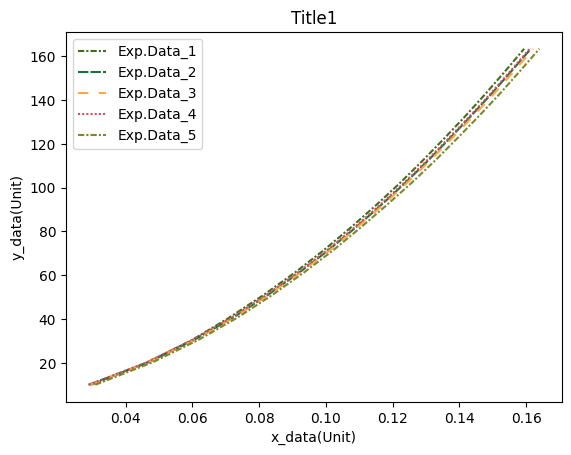

In [9]:
plt.figure()
j = 0
rand.seed(tm.time())
lineLen = len(linestyle_tuple)# number of line style
for i in range(0,2*numAdjust-1,2):
	n = size_Num(fileData[:,i])
	x_exp = str2float(fileData[:n,i])
	y_exp = str2float(fileData[:n,i+1])

	#color for graphs
	r = rand.random()
	g = rand.random()
	b = rand.random()
        #Definir color para las lineas manualmente
	#color = [(r1,g1,b1), (r2,g2,b2), ...]

	plt.plot(x_exp,y_exp, linestyle = linestyle_tuple[int(rand.uniform(0,lineLen-1))][1] ,label = "Exp.Data_"+str(int(1+(i/2))), color=(r,g,b))

plt.xlabel("x_data(Unit)")
plt.ylabel("y_data(Unit)")
plt.title("Title1")
plt.legend()
#plt.savefig("grapher_"+str(int(rand.random()*10))+".png")
plt.savefig(sys.path[0]+'/'+"grapher_0.png")
plt.show()